# Перевірка на нормальність

Більшість методів статистичного аналізу справедливі лише для спостережень, функція розподілу яких підкоряється нормальному закону. Саме тому визначення закону розподілу спостережуваної величини є необхідною складовою будь-якого статистичного аналізу.

Для більшості класичних методів статистичного аналізу можна знайти аналог, що можна застосовувати і в тих випадках, коли розподіл закону змінної відрізняється від нормального - так звані непараметричні тести. Тим не менше, у своїй більшості непараметричні тести менш точні, чуттєві та надійні. 

Існує кілька способів перевірки аналізованих даних на нормальність розподілу:  
1) графічний аналіз (візуальна перевірка),  
2) перевірка гіпотези про нормальність розподілу (формальні тести). 



Ми будемо перевіряти на нормальність вагу мишей групи 1 ("g1") з файлу mouse.csv

In [1]:
dat <- read.csv('mouse.csv')
m1 <- dat$маса[dat$група=="g1"] #вага мишей групи 1
m2 <- dat$маса[dat$група=="g2"]

In [2]:
options(repr.plot.width=5, repr.plot.height=4)

### 1) Візуальна перевірка

Візуальна перевірка може бути використана для оцінки нормальності, хоча цей підхід, як правило, ненадійний і не гарантує, що розподіл є нормальним. Проте, коли дані представлені візуально, читачі статті можуть самостійно судити про припущення щодо нормальності розподілу.  
Розподіл частоти (гістограма), графік стовбур-листя (stem-and-leaf plot), boxplot, графік P-P (ймовірність-ймовірність-графік), а також Q-Q графік (quintle-quintle графік) використовуються для перевірки нормальності візуально.  

Гістограма, дає можливість візуально судити про те, чи є розподіл дзвіноподібним, також вона показує наявність прогалини в даних та наявність викідів.

##### Гістограма

Найпростіший графічний спосіб перевірки характеру розподілу даних - побудова гістограми. Якщо гістограма має дзвіноподібний симетричний вид, можна зробити висновок про те, що аналізована змінна має приблизно нормальний розподіл. Однак при інтерпретації гістограм слід дотримуватися обережності, оскільки їх зовнішній вигляд може сильно залежати як від числа спостережень, так і від кроку, обраного для розбиття даних на класи ( hist(...breaks=...) ). Крім того, досить часто при аналізі нормально розподілених але змішаних сукупностей гістограми набувають асиметричний вид, вводячи дослідника в оману.


побудуємо гістограму та накладем на неї Гаусову криву з середнім та дисперсію як у нашої вибірки m1

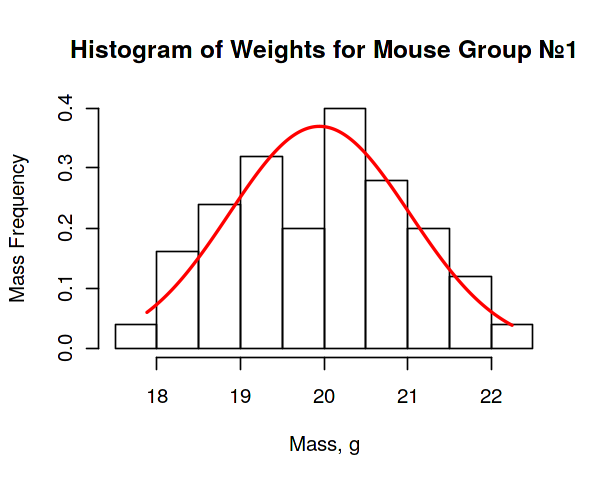

In [3]:
hist(m1,
     main="Histogram of Weights for Mouse Group №1",
     xlab="Mass, g",
     ylab="Mass Frequency",
     breaks=15,
     freq = F)

x = seq( min(m1), max(m1), 0.01 )
y = dnorm(x, mean(m1), sd(m1))
lines( x, y, col = "red", lwd=2)

Розглянемо окремі команди

**hist(...., freq = F)** - параметр freq = FALSE дозволяє побудувати гістограму на основі щільності ймовірності, а не частот значень.

Команда **seq( .... )** створює послідовність чисел:

In [4]:
seq( 10, 11, 0.2 )

[1] 10.0 10.2 10.4 10.6 10.8 11.0

Команда **dnorm(x, mn, sd)** обраховує для точок x Гаусову криву з середнім mn та стандартним відхіленням sd

In [5]:
x=c(-1, 0, 1, 2)
dnorm(x, 0, 1)

[1] 0.24197072 0.39894228 0.24197072 0.05399097

Команда **lines( x, y, col = "red", lwd=2)** в точках з координатами з векторів x, y буде лінію та додає її на вже існуючу гістограму. Лінія червона (col), товщіна 2 (lwd)

##### графік Q-Q

Іншим дуже часто вживаним графічним способом перевірки характеру розподілу даних є побудова т.зв. графіків квантилів (Q-Q plots, Quantile-Quantile plots). На таких графіках зображуються квантилі двох розподілів - емпіричного (тобто побудованого по даним що аналізуються) і теоретично очікуваного стандартного нормального розподілу. Якщо дані розподілені нормально точки на графіку квантилів повинні вибудовуватися в пряму лінію, що йде під кутом 45 градусів з лівого нижнього кута графіка. Графіки квантилів особливо корисні при роботі з невеликими за розміром вибірками, для яких неможливо побудувати гістограми, що приймають будь яку-небудь визначену форму.

В R для побудови графіків квантилів можна використовувати базову функцію qqnorm (), яка в якості основного аргументу приймає вектор зі значеннями аналізованої змінної. Додатково функція qqline будує пряму лінію, що йде під кутом 45 градусів з лівого нижнього кута графіка (якщо дані нормальні вони мають лежати при близно на ній)

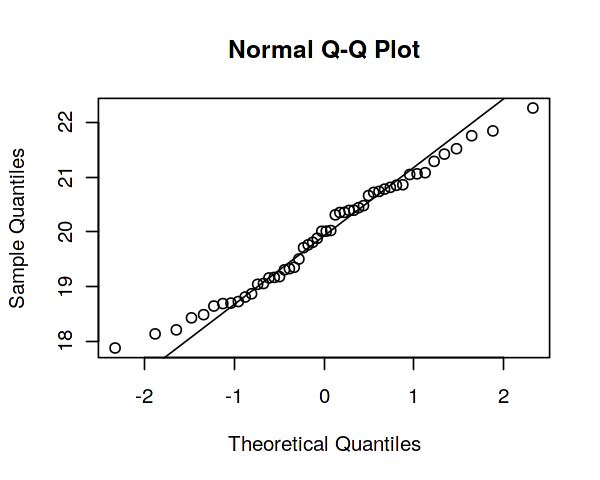

In [6]:
qqnorm(m1)
qqline(m1)

Слід зазначити, що інтерпретація графіків квантилів при роботі з невеликими вибірками, що походять з нормально розподілених генеральних сукупностей, вимагає певної навички. Справа в тому, що при невеликому числі спостережень точки на графіку квантилів можуть не завжди утворювати чітко виражену пряму лінію.

##### графік Q-Q з довірчими огинаючими

Інтерпретація графіка qqnorm () складна. Більш наглядним є Q-Q графік, побудований за допомогою функції qqPlot () з пакету car.

In [7]:
library(car)

Loading required package: carData


[1] 24 30

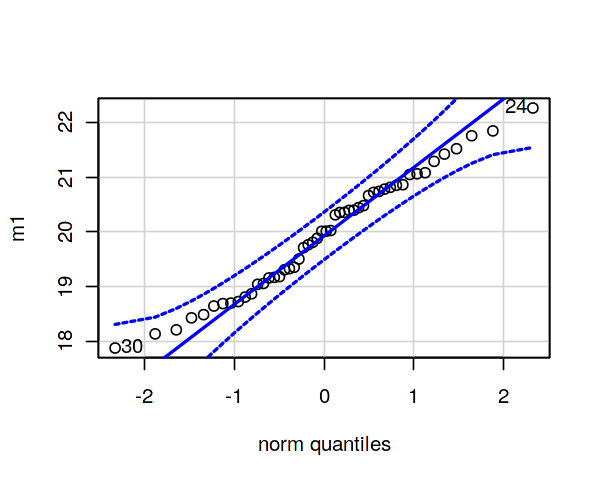

In [8]:
# envelope - рівень довіри
# envelope% кривих QQ, для яких відомо що вони для нормальної величини,
# потрапляють в область що показана довірчими огинаючими
#qqPlot(m1, dist= "norm", envelope=.95, xlab="Квантилі нормального розподілу", ylab="Спостережувані квантилі", main="Графік квантиль-квантиль\nдля #велечини m1")
qqPlot(m1)

Інтерпретація такого графіка досить проста:

Пряма червона безперервна лінія символізує теоретичне нормальний розподіл: якби розподіл що аналізується (відображається на графіку круглими точками) був нормальним, вони б в точності лягли на цю лінію.  
Пунктирні червоні лінії обмежують допустимі відхилення від нормального розподілу в межах 95% довірчого інтервалу (за замовчуванням).
Точки за межами пунктирних ліній говорять про те, що розподіл що аналізується не є нормальним, або про наявність викидів (outliers).

https://www.r-bloggers.com/the-many-uses-of-q-q-plots/  
https://uk.wikipedia.org/wiki/%D0%94%D0%BE%D0%B2%D1%96%D1%80%D1%87%D0%B8%D0%B9_%D1%96%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB
http://r-train.ru/%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B8-%D0%BA%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C-%D0%BA%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C/

#### 2) Формальні тести

Існує цілий ряд статистичних тестів, спеціально розроблених для перевірки нормальності розподілу даних. У загальному вигляді перевіряється за допомогою цих тестів нульову гіпотезу можна сформулііровать так: "Анализируемая вибірка відбувається з генеральної сукупності, що має нормальний розподіл". Якщо отримується за допомогою того чи іншого тесту ймовірність помилки Р виявляється менше деякого заздалегідь прийнятого рівня значущості (наприклад, 0.05), нульова гіпотеза відхиляється.

В R реалізовані практично всі наявні тести на нормальність - або у вигляді стандарних функцій, або у вигляді функцій, що входять до складу окремих пакетів. Прикладом базової функції є shapiro.test (), за допомогою якої можна виконати широко використовуваний тест Шапіро-Уілкі.

**тест Шапіро-Уілка**

In [9]:
shapiro.test(m1)


	Shapiro-Wilk normality test

data:  m1
W = 0.97799, p-value = 0.4705


як бачимо p-value > 0.05 - нульова гіпотеза не відкидається (тобто данні нормально розподілені)

Основні класичні критерії перевірки на нормальність зібрані в пакеті nortest. Пакет можна встановити з CRAN за допомогою виклику функції install.packages:

In [10]:
#install.packages("nortest")

Підключити встановлений пакет можна за допомогою функції library ():

In [11]:
library(nortest)

**тест Андерсона-Дарлінга**

In [12]:
ad.test(m1)


	Anderson-Darling normality test

data:  m1
A = 0.38514, p-value = 0.3799


**тест Крамера фон Мізеса**

In [13]:
cvm.test(m1)


	Cramer-von Mises normality test

data:  m1
W = 0.068382, p-value = 0.2877


**тест Колмогорова-Смірнова в модифікації Лілліефорса**

In [14]:
lillie.test(m1)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  m1
D = 0.091938, p-value = 0.3627


**тест Шапіро-Франсія**

In [15]:
sf.test(m1)


	Shapiro-Francia normality test

data:  m1
W = 0.98412, p-value = 0.6399


##### Література
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/  
http://iopscience.iop.org/article/10.1088/1742-6596/435/1/012041/meta  

http://datascientist.one/proverka-na-normalnost/  
http://sixsigmaonline.ru/baza-znanij/22-1-0-251  
http://sixsigmaonline.ru/baza-znanij/22-1-0-252  
http://r-analytics.blogspot.de/2012/06/blog-post_14.html#.WgDC82h-q70  
https://star.inp.nsk.su/~baldin/DataAnalysis/R/R-05-2var.pdf  
http://www.uic.unn.ru/~zny/ml/Labs/R/lab2.pdf  
http://webspace.ship.edu/pgmarr/Geo441/Lectures/Lec%205%20-%20Normality%20Testing.pdf
